# Practical Lab 3 - Univariate Linear Regression
## Univariate Linear Regression on the California Housing Prices Dataset

In this lab you will train your first machine learning model in our course - a univariate linear regression model. You are asked to run a linear regression between the median house value (dependent variable) and each of the following independent variables. You should run three models, one for each independent variable: 

- median income
- population
- number of households

### 1. Framing the Problem - Describe the goal of this report (0.4 point).

> Try to use different variable to explore more possible factors for modeling with linear regression. There are some several advantages, such as gaining more insights from the provided dataset (resource data) through a process known as "**feature discovery**". It also aids in determining key values for effective feature engineering.

> Through this process, we can compare the impact of each variable on the **target prediction (median house value)** to process the model.

### 2. Getting the Data - hyperlinking to the source (0.1 point) and loading into Pandas (0.1 point).

In [1]:
import pandas as pd

df = pd.read_csv("./data/housing.csv")
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 3. Exploratory Data Analysis (EDA):
Explore statistics (e.g. using Pandas `describe` function) (0.2 point)
Describe the 4 variables used in this lab. Review the range of the data for each variable, and other issues you notice (0.3 point)
Create three Seaborn scatter plots of median house value vs. median income, population and number of households. There should be one scatter plot per each independent variable. Add a title to each graph (using Seaborn). Provide textual review of what you see in these graphs (relevant insights). (0.6 points).

In [2]:
df[["population", "households", "median_income", "median_house_value"]].describe()

,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,1425.476744,499.539680,3.870671,206855.816909
std,1132.462122,382.329753,1.899822,115395.615874
min,3.000000,1.000000,0.499900,14999.000000
25%,787.000000,280.000000,2.563400,119600.000000
50%,1166.000000,409.000000,3.534800,179700.000000
75%,1725.000000,605.000000,4.743250,264725.000000
max,35682.000000,6082.000000,15.000100,500001.000000


> There is a significant gap between the 75% percentile and the max values for `population` and `households.`, with one off by a factor of 20 (1725 vs 35682) and the other off by a factor of 10 (605 vs 6082). In contrast, there is only a factor of nearly 4 (4.74 vs 15) in `median_income`. Furthermore, the mean values for `population` and `households` are 1425 and 499, respectively, which are significantly lower compared to their respective maximum values, indicating potential outliers. In conclusion, if necessary, we should put effort into pre-processing to address this issues.

In [3]:
import seaborn as sns

### Scatter plot between `population` and `median_house_value` 

<Axes: xlabel='population', ylabel='median_house_value'>

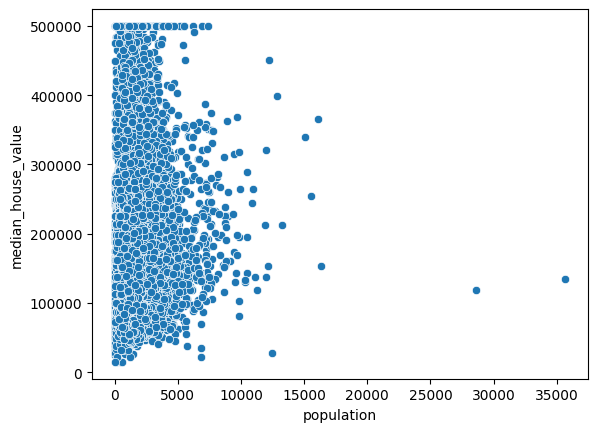

In [4]:
sns.scatterplot(data=df, x="population", y="median_house_value" )

> As mentioned earlier, the population values between 10,000 and 35,000 appear to be somewhat unusual compared to the rest of the data points, particularly the two points with approximately 29,000 and 36,000 populations. Furthermore, there is another unusual fact which can not be observed on the function of `data.describe()`, that is we can see a lot of points of population from 0 and round 7,500 all have same `median_house_value` value of 500,000. It should not be like this in most normal circumstances, so I assumed these value originally are null value or empty, someone do some operations to assign them the maximum value.

### Scatter plot between `households` and `median_house_value` 

<Axes: xlabel='households', ylabel='median_house_value'>

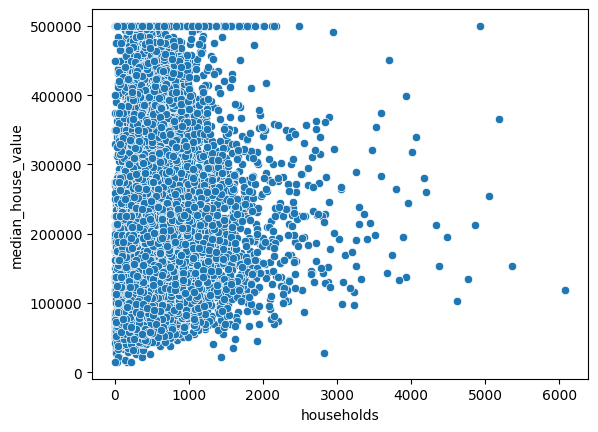

In [5]:
sns.scatterplot(data=df, x="households", y="median_house_value" )

> In this graph generated with `households` and `median_house_value,` I notice the same issues mentioned in the population section. Apart from that, I observe that the majority of points are located in a relatively similar region. On the X-axis (`households`), values range between 0 and approximately 1,200, while on the Y-axis (`median_house_value`), they are between 0 and 500,000." However, we cannot explicitly define a clear regression relationship for them because on the X-axis, each value from 0 to 2,000 encompasses a wide range of 'median_house_value' values.

### Scatter plot between `median_income` and `median_house_value` 

<Axes: xlabel='median_income', ylabel='median_house_value'>

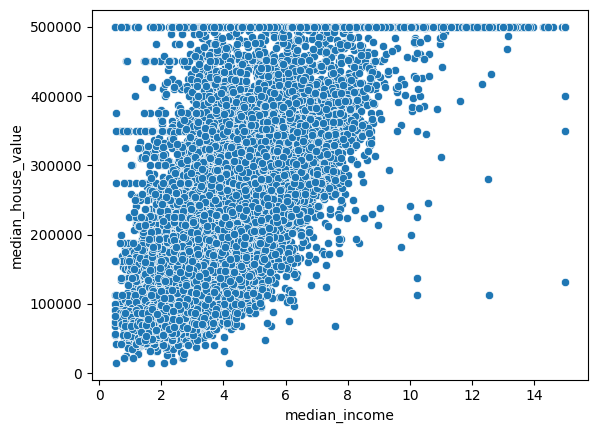

In [6]:
sns.scatterplot(data=df, x="median_income", y="median_house_value" )

> For the graphic of `median_income` and `median_house_value`, except for the issuse of some points on the same line of 500,000 `median_house_value`. This is a good regression relationship between dependent variable and independent variable example, because we can clearly find the Univariate Linear Regression from the graphic. However, I noticed that there are three lines in `median_house_value`: 29,000, 35,000, and 45,000. Some different income units but shares the same `median_house_value`, so it formed apparent lines on that, maybe we need to keep eyes on that if we need to do further AI and ML operations. 

### 4. Run three linear regressions (fitting) between (1.2 points):
- median house value vs. median income
- median house value vs. population
- median house value vs. number of households.

In [7]:
from sklearn import linear_model


model_median_income = linear_model.LinearRegression()
model_population = linear_model.LinearRegression()
model_households = linear_model.LinearRegression()

model_median_income.fit(X=df[["median_income"]], y=df[["median_house_value"]])
model_population.fit(X=df[["population"]], y=df[["median_house_value"]])
model_households.fit(X=df[["households"]], y=df[["median_house_value"]])

LinearRegression()

### 5. Summarize in a table, for each of the three models:
- intercept and slope (0.5 point)
- Mean Squared Error - the loss (0.3 point)
- Mean Absolute Error (0.3 point)

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("The result of model of Median_Income:")
print(f"Intercept: {model_median_income.intercept_}, Coefficients => {model_median_income.coef_}")
print(f"Mean squared error: {mean_squared_error(df[['median_house_value']], model_median_income.predict(df[['median_income']]))}")
print(f"Mean absolute error: {mean_absolute_error(df[['median_house_value']], model_median_income.predict(df[['median_income']]))}\n")

print("The result of model of Population:")
print(f"Intercept: {model_population.intercept_}, Coefficients: {model_population.coef_}")
print(f"Mean squared error: {mean_squared_error(df[['median_house_value']], model_population.predict(df[['population']]))}")
print(f"Mean absolute error: {mean_absolute_error(df[['median_house_value']], model_population.predict(df[['population']]))}\n")

print("The result of model of Median_Households:")
print(f"Intercept: {model_households.intercept_}, Coefficients: {model_households.coef_}")
print(f"Mean squared error: {mean_squared_error(df[['median_house_value']], model_households.predict(df[['households']]))}")
print(f"Mean absolute error: {mean_absolute_error(df[['median_house_value']], model_households.predict(df[['households']]))}\n")


The result of model of Median_Income:
Intercept: [45085.57670327], Coefficients => [[41793.8492019]]
Mean squared error: 7011311502.929527
Mean absolute error: 62625.9337911434

The result of model of Population:
Intercept: [210436.26207627], Coefficients: [[-2.51175277]]
Mean squared error: 13307412412.389355
Mean absolute error: 91153.82009473183

The result of model of Median_Households:
Intercept: [196928.57716233], Coefficients: [[19.87277516]]
Mean squared error: 13257776904.728533
Mean absolute error: 90802.74324318448



### 6. Plot the resulting line on top of the scatter data for each of the three models (three separate graphs) (1 point)

### Result line of Population

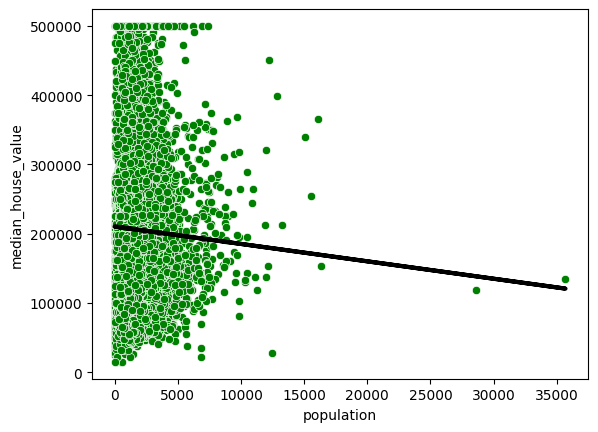

In [9]:
import matplotlib.pyplot as plt

sns.scatterplot(x="population", y="median_house_value", data=df, color="green")
plt.plot(df[["population"]], model_population.predict(df[["population"]]), color="black", linewidth=3)
plt.show()

### Result line of Households

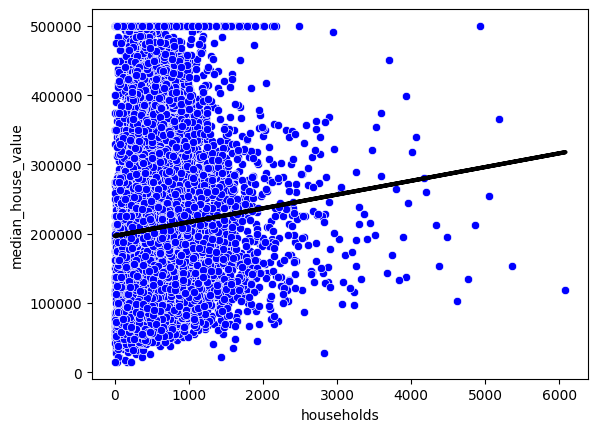

In [10]:
sns.scatterplot(x="households", y="median_house_value", data=df, color="blue")
plt.plot(df[["households"]], model_households.predict(df[["households"]]), color="black", linewidth=3)
plt.show()

### Result line of Median_Income

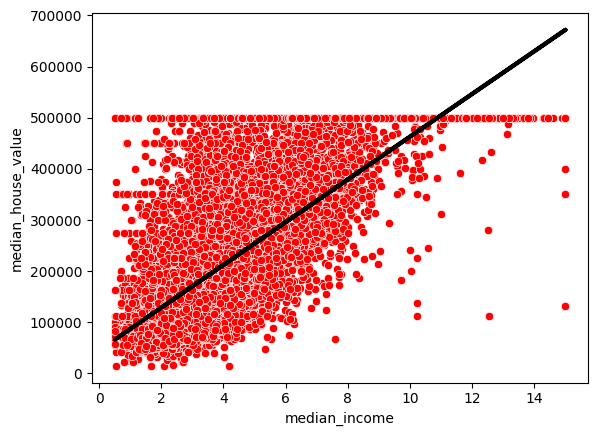

In [11]:
sns.scatterplot(x="median_income", y="median_house_value", data=df, color="red")
plt.plot(df[["median_income"]], model_median_income.predict(df[["median_income"]]), color="black", linewidth=3)
plt.show()

### 7. Provide a conclusion about the goodness-of-fit, and other insights you might have (1 point)

> The result lines provides a power evidences that we can clearly find the Univariate Linear Regression on `Median_Income`, the data is evenly distributed on both sides of the result line, similar to how the data trends according to the distribution of the model we have calculated. It is a great independent variable for this scenario (data set).